In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
# Base Directory where data is stored
base_data_dir = '/home/rbbidart/project/rbbidart/breakHis/'
base_out_dir = '/home/rbbidart/breakHis_out'

fast_ai_dir = '/home/rbbidart/fastai/'
sys.path.append(fast_ai_dir)

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [15]:
PATH='/home/rbbidart/project/rbbidart/breakHis/mkfold_keras_8/fold1/100/'
if not os.path.exists(os.path.join(PATH,'models')):
    os.makedirs(os.path.join(PATH,'models'))
if not os.path.exists(os.path.join(PATH,'sample')):
    os.makedirs(os.path.join(PATH,'sample'))
sz=224
torch.cuda.is_available()

True

In [16]:
torch.backends.cudnn.enabled

True

In [17]:
os.listdir(PATH)

['sample', '._.DS_Store', 'models', 'valid', 'test', '.DS_Store', 'train']

['M_LC', 'B_F', '._.DS_Store', 'B_A', 'M_PC', 'M_DC', '.DS_Store', 'B_PT', 'M_MC', 'B_TA']


array([[[0.46667, 0.40392, 0.50588],
        [0.46275, 0.38824, 0.49804],
        [0.45882, 0.38431, 0.5098 ],
        [0.45882, 0.37255, 0.51373]],

       [[0.48627, 0.42745, 0.51765],
        [0.46667, 0.39608, 0.49804],
        [0.4549 , 0.38039, 0.49804],
        [0.44314, 0.36078, 0.4902 ]],

       [[0.50588, 0.45098, 0.54118],
        [0.45882, 0.39608, 0.49804],
        [0.45882, 0.38431, 0.50196],
        [0.45882, 0.37255, 0.51373]],

       [[0.47059, 0.41176, 0.50196],
        [0.45098, 0.38824, 0.4902 ],
        [0.43922, 0.37647, 0.4902 ],
        [0.45098, 0.37255, 0.5098 ]]], dtype=float32)

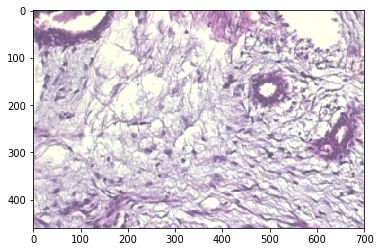

In [27]:
print(os.listdir(f'{PATH}valid'))

files = os.listdir(f'{PATH}valid/B_F')[:5]
files

img = plt.imread(f'{PATH}valid/B_F/{files[0]}')
plt.imshow(img)
img.shape
img[:4,:4]

In [30]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/rbbidart/.torch/models/resnet34-333f7ec4.pth


KeyboardInterrupt: 